## Learning curve demo

In [1]:
import pandas as pd
electricity = pd.read_excel('Folds5x2_pp.xlsx')
print(electricity.info())
electricity.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB
None


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

train_sizes = [1, 100, 500, 2000, 5000, 7654]
features = ['AT', 'V', 'AP', 'RH']
target = 'PE'

train_sizes, train_scores, validation_scores = learning_curve(
    estimator = LinearRegression(),
    X = electricity[features],
    y = electricity[target], train_sizes = train_sizes, cv = 5,
    scoring = 'neg_mean_squared_error', 
    shuffle=True)

# k-fold cross-validation is 5, so there will be 5 splits

In [8]:
print('Train sizes: ', train_sizes)
print('Training scores:\n\n', train_scores)
print('Validation scores:\n\n', validation_scores)

Train sizes:  [   1  100  500 2000 5000 7654]
Training scores:

 [[ -0.          -0.          -0.          -0.          -0.        ]
 [-16.72344304 -18.60061456 -19.43060748 -12.75985151 -36.03564421]
 [-18.1212239  -20.6366812  -19.84013339 -24.84021477 -21.45678617]
 [-21.00755013 -20.58042174 -20.02337195 -22.55140776 -20.95422941]
 [-20.76073898 -20.59606688 -20.52837838 -21.13878575 -20.35926323]
 [-20.98565335 -20.63006094 -21.04384703 -20.62942849 -20.52941486]]
Validation scores:

 [[-356.13004378 -766.0265187  -307.96727983 -473.38477026 -288.87777141]
 [ -20.2952826   -21.95835613  -20.62627087  -22.654715    -22.92788019]
 [ -20.3050768   -21.71932035  -20.25433192  -21.70866986  -22.00405031]
 [ -19.95525952  -21.38026391  -19.68534748  -21.31721417  -21.83358451]
 [ -19.92226129  -21.34626633  -19.64846369  -21.29541055  -21.78316108]
 [ -19.9046791   -21.33448781  -19.67831137  -21.319592    -21.73734386]]


In [9]:
# mean value of each row
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

In [11]:
print(train_scores_mean)
print()
print(validation_scores_mean)

[-0.         20.71003216 20.97900788 21.0233962  20.67664664 20.76368093]

[438.4772768   21.69250096  21.19828985  20.83433392  20.79911259
  20.79488283]


/var/folders/t1/zclr_f3s57j185f2tblqgwt00000gn/T/ipykernel_13536/4104143309.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


(0.0, 40.0)

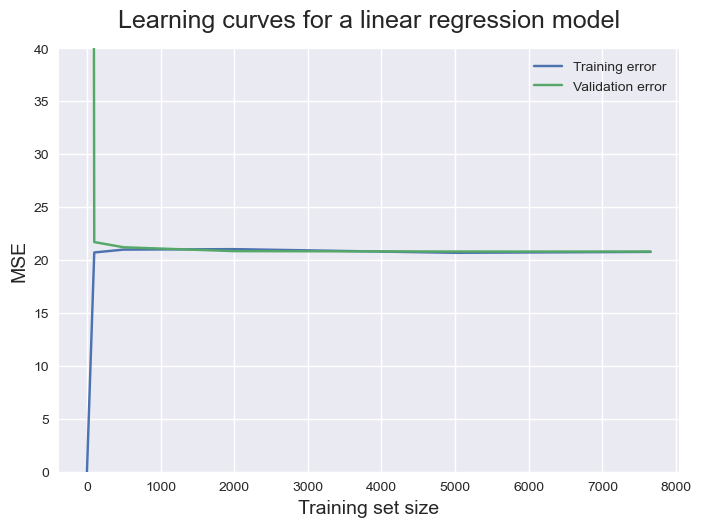

In [10]:
# Plot the learning curve
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)

/var/folders/t1/zclr_f3s57j185f2tblqgwt00000gn/T/ipykernel_13536/3082196700.py:33: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


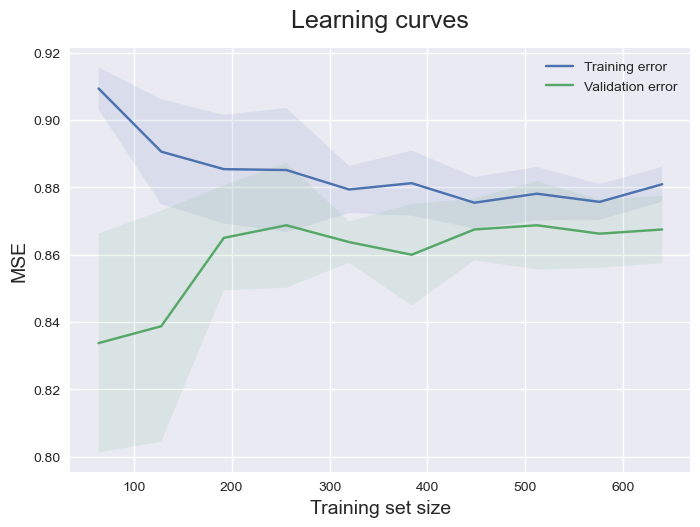

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Load your data and split it into training and validation sets

# Define your logistic regression model with ridge regularization
logreg = LogisticRegression(penalty='l2', solver='lbfgs')

# Generate example data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the range of training set sizes to use for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve
train_sizes, train_scores, validation_scores = learning_curve(
    logreg, X_train, y_train, train_sizes=train_sizes, cv=5)

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot the learning curve
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1)
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()
plt.show()